In [3]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import random

In [4]:
drive.mount('/content/drive')
path = 'drive/MyDrive/ASD_Research/'
data = pd.read_csv(path + 'combined.csv')

Mounted at /content/drive


In [5]:
print(data.head())

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age  Sex  Ethnicity  Jaundice  \
0   0   0   0   0   0   0   1   1   0    1    2    0          4         1   
1   1   1   0   0   0   1   1   0   0    0    3    1          0         1   
2   1   0   0   0   0   0   1   1   0    1    3    1          4         1   
3   1   1   1   1   1   1   1   1   1    1    2    1          3         0   
4   1   1   0   1   1   1   1   1   1    1    2    0          0         0   

   ASD_traits  
0           0  
1           1  
2           1  
3           1  
4           1  


In [6]:
x_vals = data.iloc[:, 0:14]
y_vals = data.iloc[:, 14]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x_vals, y_vals, test_size=0.2, random_state=345712
)

rf = RandomForestClassifier(
    oob_score=False,
    n_estimators=500,
    min_weight_fraction_leaf=0,
    min_samples_split=10,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    max_features="sqrt",
    max_depth=50,
    class_weight=None,
    ccp_alpha=0,
    bootstrap=True,
    random_state=55167
)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)


0.9614643545279383

In [16]:
features = pd.DataFrame(rf.feature_importances_, index = x_vals.columns)
print(features.head(14))

                  0
A1         0.034785
A2         0.026364
A3         0.018884
A4         0.030253
A5         0.041389
A6         0.076552
A7         0.058295
A8         0.025230
A9         0.063226
A10        0.027053
Age        0.176825
Sex        0.106130
Ethnicity  0.231883
Jaundice   0.083132


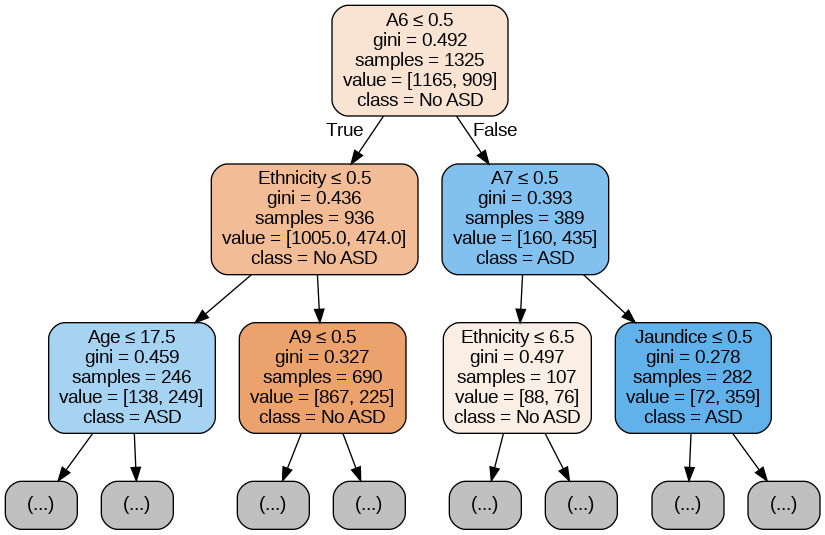

In [17]:
tree_to_plot = rf.estimators_[0]

# Export the tree to Graphviz format
dot_data = export_graphviz(
    tree_to_plot,
    out_file=None,
    feature_names=x_vals.columns,
    class_names=["No ASD", "ASD"],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=2  # Limit depth to simplify visualization
)

# Render the tree using Graphviz and save as a PNG
graph = graphviz.Source(dot_data)
graph.format = 'png'  # Specify PNG format
graph.render("tree_visualization", cleanup=True)  # Saves as 'tree_visualization.png'

# Display inline (optional, for quick preview in Colab)
from IPython.display import Image
Image(filename="tree_visualization.png")

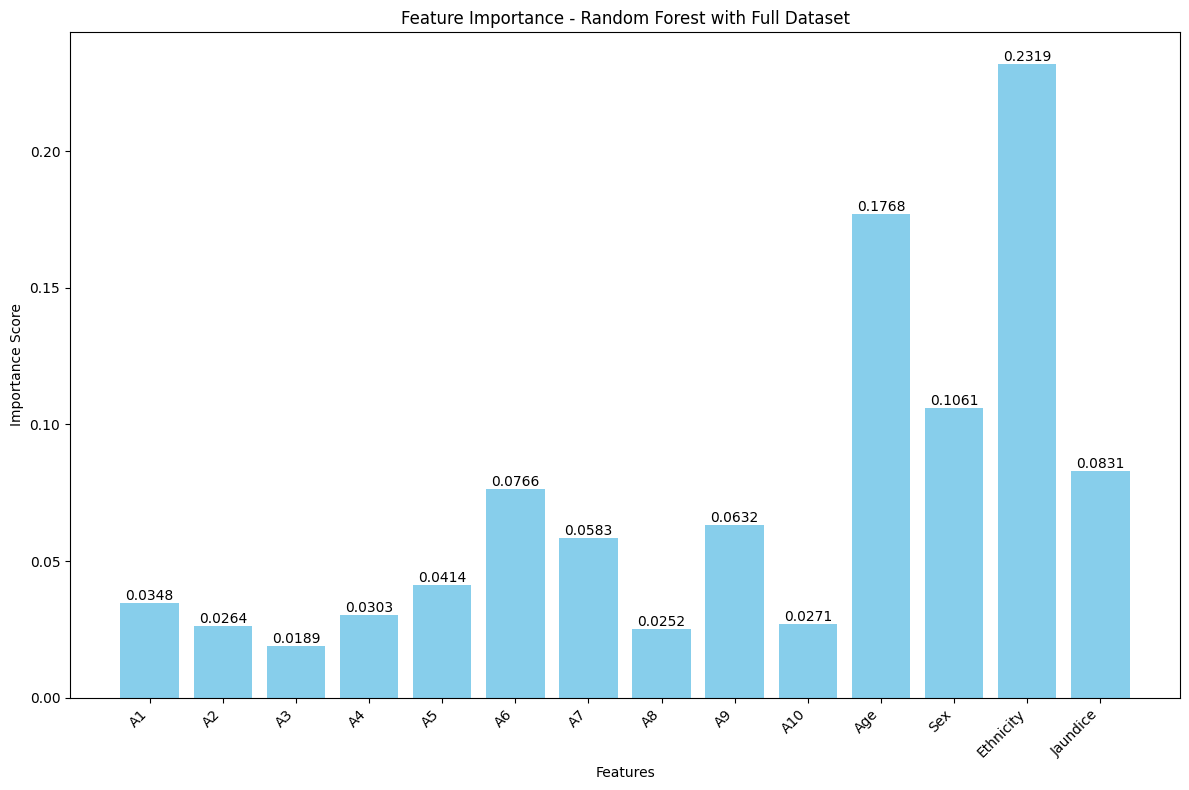

In [18]:
feature_importance = rf.feature_importances_

plt.figure(figsize=(12, 8))
bars = plt.bar(x_vals.columns, feature_importance, color='skyblue')

# Add values on top of each bar
for bar, importance in zip(bars, feature_importance):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),  # Place text at the top of the bar
        f'{importance:.4f}',  # Format the importance value
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )

plt.title("Feature Importance - Random Forest with Full Dataset")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

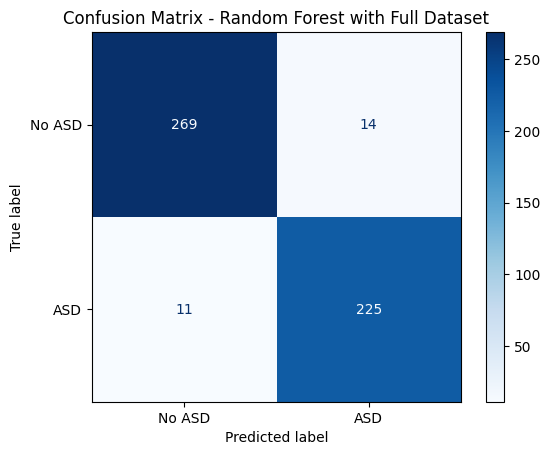

Classification Report:
              precision    recall  f1-score   support

      No ASD       0.96      0.95      0.96       283
         ASD       0.94      0.95      0.95       236

    accuracy                           0.95       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.95      0.95      0.95       519



In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

x_train, x_test, y_train, y_test = train_test_split(
    x_vals, y_vals, test_size=0.2, random_state=8403
)

# Fit the Random Forest model
rf = RandomForestClassifier(
    oob_score=False,
    n_estimators=100,
    min_weight_fraction_leaf=0,
    min_samples_split=2,
    min_samples_leaf=4,
    max_leaf_nodes=50,
    max_features="sqrt",
    max_depth=None,
    class_weight="balanced",
    ccp_alpha=0,
    bootstrap=False,
    random_state=8403
)
rf.fit(x_train, y_train)

# Predict on the test set
y_pred = rf.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No ASD", "ASD"])

# Plot the Confusion Matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest with Full Dataset")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No ASD", "ASD"]))